# 필요한 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

%matplotlib inline

# matplotlib 한글 깨짐 해결
plt.rcParams['font.family'] = 'AppleGothic' # For MacOS
plt.rcParams['axes.unicode_minus'] =False

# Seaborn 폰트 설정
sns.set(font='AppleGothic') # 사용하고 있는 한글 폰트로 변경

print(plt.rcParams['font.family'])

['AppleGothic']


# 데이터 불러오기

In [2]:
users_df = pd.read_csv('train_users_2.csv') # 전처리된 데이터 불러오기
users_df.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [3]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

In [4]:
sessions_df = pd.read_csv('sessions.csv')
sessions_df.head(10)

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
5,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,7703.0
6,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,115.0
7,d1mm9tcy42,personalize,data,wishlist_content_update,Windows Desktop,831.0
8,d1mm9tcy42,index,view,view_search_results,Windows Desktop,20842.0
9,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,683.0


# users_df 전처리
- 18~122세 이외의 age -> null처리
- 범주형인데 object 타입 -> category 타입으로 변환
- date_account_created, date_first_booking : datetime 타입으로 변환 (%Y-%m-%d 형식)
- timestamp_first_active : datetime 타입으로 변환 (%Y-%m-%d %H:%M:%S 형식)

In [5]:
# age 컬럼에서 18세 이상 122세 이하의 값을 제외한 나머지 값을 null로 처리
users_df.loc[(users_df['age'] < 18) | (users_df['age'] > 122), 'age'] = np.nan

users_df.age.isnull().sum()

88929

In [6]:
# 변환할 컬럼 지정
columns_to_convert = [
    'gender', 'signup_method', 'language', 'affiliate_channel', 
    'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 
    'first_device_type', 'first_browser', 'country_destination'
]

for column in columns_to_convert:
    users_df[column] = users_df[column].astype('category')

print(users_df.dtypes)

id                           object
date_account_created         object
timestamp_first_active        int64
date_first_booking           object
gender                     category
age                         float64
signup_method              category
signup_flow                   int64
language                   category
affiliate_channel          category
affiliate_provider         category
first_affiliate_tracked    category
signup_app                 category
first_device_type          category
first_browser              category
country_destination        category
dtype: object


In [7]:
# date_account_created 및 date_first_booking 컬럼을 datetime 타입으로 변환
users_df['date_account_created'] = pd.to_datetime(users_df['date_account_created'])
users_df['date_first_booking'] = pd.to_datetime(users_df['date_first_booking'])

# timestamp_first_active는 타임스탬프 형식으로 되어있으므로 변환
users_df['timestamp_first_active'] = pd.to_datetime(users_df['timestamp_first_active'], format='%Y%m%d%H%M%S')

In [8]:
users_df.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,2010-01-01 21:56:19,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,2010-01-02 01:25:58,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,2010-01-03 19:19:05,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,2010-01-04 00:42:11,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,2010-01-04 02:37:58,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


In [9]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       213451 non-null  object        
 1   date_account_created     213451 non-null  datetime64[ns]
 2   timestamp_first_active   213451 non-null  datetime64[ns]
 3   date_first_booking       88908 non-null   datetime64[ns]
 4   gender                   213451 non-null  category      
 5   age                      124522 non-null  float64       
 6   signup_method            213451 non-null  category      
 7   signup_flow              213451 non-null  int64         
 8   language                 213451 non-null  category      
 9   affiliate_channel        213451 non-null  category      
 10  affiliate_provider       213451 non-null  category      
 11  first_affiliate_tracked  207386 non-null  category      
 12  signup_app      

In [10]:
# 'id' 컬럼 값의 개수
num_users_ids = users_df['id'].nunique()

# 'user_id' 컬럼의 유니크한 값의 개수
num_session_user_ids = sessions_df['user_id'].nunique()

# 비교 결과 출력
print(f"Users DataFrame의 'id' 값의 개수: {num_users_ids}")
print(f"Sessions DataFrame의 'user_id' 유니크한 값의 개수: {num_session_user_ids}")

# 동일한지 여부 확인
if num_users_ids == num_session_user_ids:
    print("두 데이터프레임의 값의 개수가 동일합니다.")
else:
    print("두 데이터프레임의 값의 개수가 동일하지 않습니다.")

Users DataFrame의 'id' 값의 개수: 213451
Sessions DataFrame의 'user_id' 유니크한 값의 개수: 135483
두 데이터프레임의 값의 개수가 동일하지 않습니다.


# 세션 타임스탬프 만들기
1. sessions_df와 users_df를 유저id 기준으로 LEFT JOIN한다.
2. 각 유저id별로 timestamp_first_active(첫 번째 활동의 타임스탬프)에 secs_elapsed(해당 이벤트부터 다음 이벤트까지 세션 경과시간)을 더해서 session_timestamp 컬럼을 새롭게 생성해 그곳에 정보를 담는다.

In [11]:
# 데이터 병합
users_df.rename(columns={'id': 'user_id'}, inplace=True)
merged_df = sessions_df.merge(users_df[['user_id', 'date_account_created', 'date_first_booking', 'timestamp_first_active']], on='user_id', how='left')

merged_df.head(10)

,user_id,action,action_type,action_detail,device_type,secs_elapsed,date_account_created,date_first_booking,timestamp_first_active
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0,2014-01-01,2014-01-04,2014-01-01 00:09:36
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0,2014-01-01,2014-01-04,2014-01-01 00:09:36
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0,2014-01-01,2014-01-04,2014-01-01 00:09:36
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0,2014-01-01,2014-01-04,2014-01-01 00:09:36
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0,2014-01-01,2014-01-04,2014-01-01 00:09:36
5,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,7703.0,2014-01-01,2014-01-04,2014-01-01 00:09:36
6,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,115.0,2014-01-01,2014-01-04,2014-01-01 00:09:36
7,d1mm9tcy42,personalize,data,wishlist_content_update,Windows Desktop,831.0,2014-01-01,2014-01-04,2014-01-01 00:09:36
8,d1mm9tcy42,index,view,view_search_results,Windows Desktop,20842.0,2014-01-01,2014-01-04,2014-01-01 00:09:36
9,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,683.0,2014-01-01,2014-01-04,2014-01-01 00:09:36


In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 9 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   user_id                 object        
 1   action                  object        
 2   action_type             object        
 3   action_detail           object        
 4   device_type             object        
 5   secs_elapsed            float64       
 6   date_account_created    datetime64[ns]
 7   date_first_booking      datetime64[ns]
 8   timestamp_first_active  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), object(5)
memory usage: 725.6+ MB


In [13]:
# 세션 타임스탬프 계산
merged_df['session_timestamp'] = merged_df['timestamp_first_active'] + pd.to_timedelta(merged_df['secs_elapsed'], unit='s')
merged_df.head(10)

,user_id,action,action_type,action_detail,device_type,secs_elapsed,date_account_created,date_first_booking,timestamp_first_active,session_timestamp
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0,2014-01-01,2014-01-04,2014-01-01 00:09:36,2014-01-01 00:14:55
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0,2014-01-01,2014-01-04,2014-01-01 00:09:36,2014-01-01 18:58:49
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0,2014-01-01,2014-01-04,2014-01-01 00:09:36,2014-01-01 00:14:37
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0,2014-01-01,2014-01-04,2014-01-01 00:09:36,2014-01-01 06:18:37
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0,2014-01-01,2014-01-04,2014-01-01 00:09:36,2014-01-01 00:16:51
5,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,7703.0,2014-01-01,2014-01-04,2014-01-01 00:09:36,2014-01-01 02:17:59
6,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,115.0,2014-01-01,2014-01-04,2014-01-01 00:09:36,2014-01-01 00:11:31
7,d1mm9tcy42,personalize,data,wishlist_content_update,Windows Desktop,831.0,2014-01-01,2014-01-04,2014-01-01 00:09:36,2014-01-01 00:23:27
8,d1mm9tcy42,index,view,view_search_results,Windows Desktop,20842.0,2014-01-01,2014-01-04,2014-01-01 00:09:36,2014-01-01 05:56:58
9,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,683.0,2014-01-01,2014-01-04,2014-01-01 00:09:36,2014-01-01 00:20:59


# 기기별로 DAU, MAU, WAU 계산 및 시각화

In [14]:
# Device type 별 DAU, WAU, MAU 계산
def calculate_active_users(merged_df, freq):
    active_users = merged_df.groupby([pd.Grouper(key='session_timestamp', freq=freq), 'device_type'])['user_id'].nunique().reset_index()
    active_users = active_users.pivot(index='session_timestamp', columns='device_type', values='user_id').fillna(0)
    return active_users

# DAU
dau_device = calculate_active_users(merged_df, 'D')

# WAU
wau_device = calculate_active_users(merged_df, 'W')

# MAU
mau_device = calculate_active_users(merged_df, 'M')

## 1) DAU 시각화

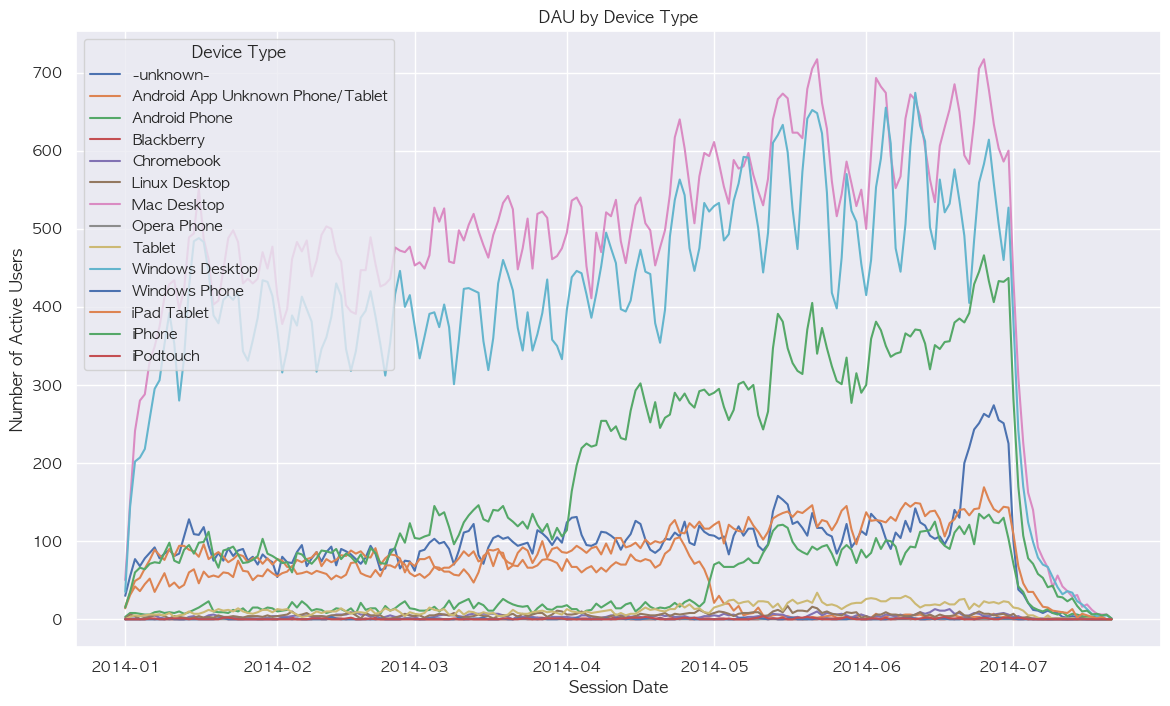

In [17]:
plt.figure(figsize=(14, 8))

for device_type in dau_device.columns:
    plt.plot(dau_device.index, dau_device[device_type], label=device_type)

plt.title('DAU by Device Type')
plt.xlabel('Session Date')
plt.ylabel('Number of Active Users')
plt.legend(title='Device Type')
plt.show()

## 2) WAU 시각화

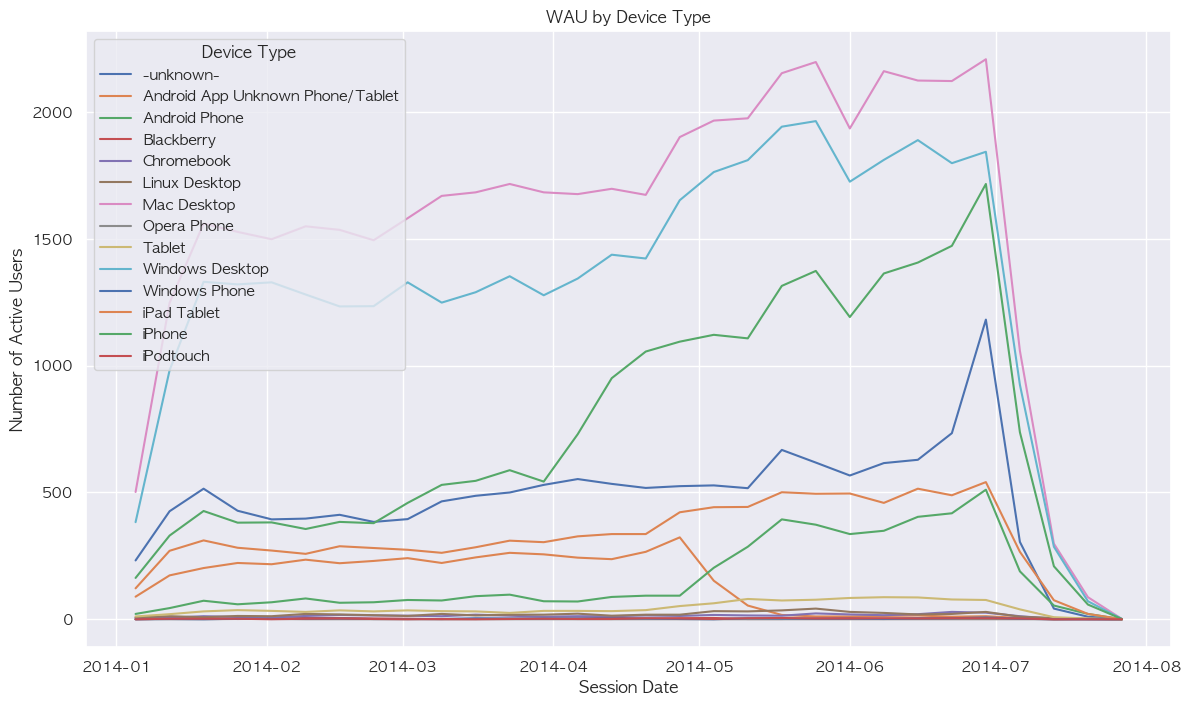

In [15]:
plt.figure(figsize=(14, 8))

for device_type in dau_device.columns:
    plt.plot(wau_device.index, wau_device[device_type], label=device_type)

plt.title('WAU by Device Type')
plt.xlabel('Session Date')
plt.ylabel('Number of Active Users')
plt.legend(title='Device Type')
plt.show()

## 3) MAU 시각화

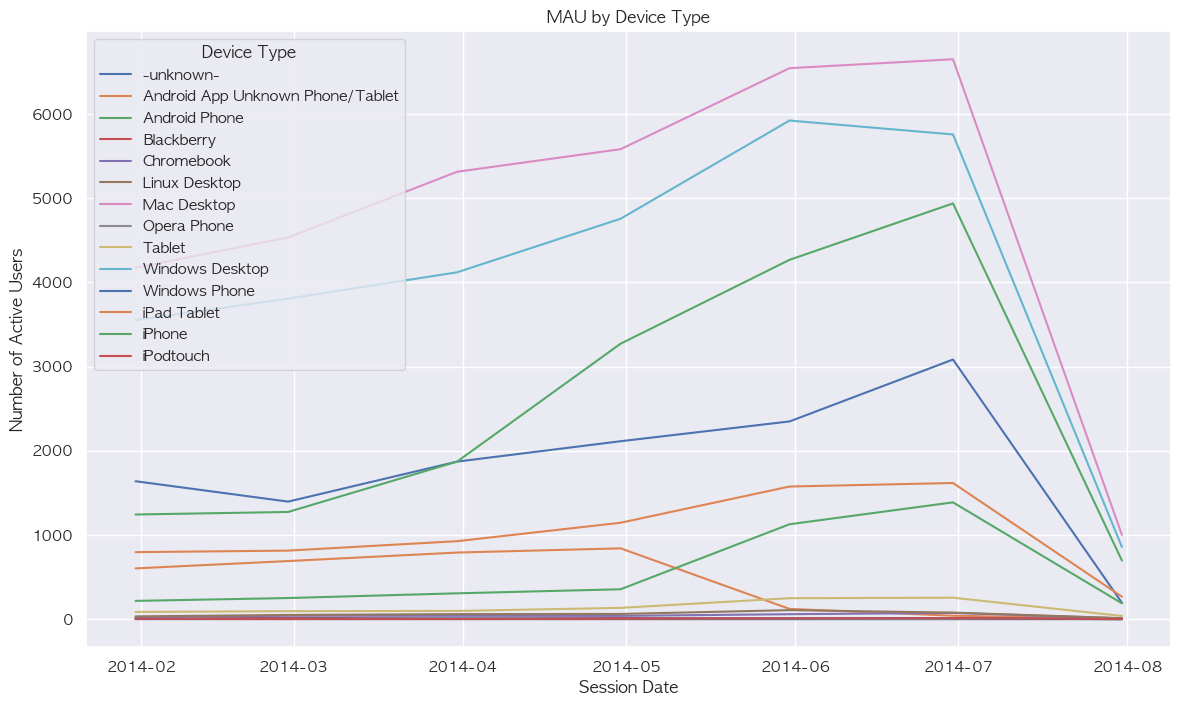

In [16]:
plt.figure(figsize=(14, 8))

for device_type in dau_device.columns:
    plt.plot(mau_device.index, mau_device[device_type], label=device_type)

plt.title('MAU by Device Type')
plt.xlabel('Session Date')
plt.ylabel('Number of Active Users')
plt.legend(title='Device Type')
plt.show()

# 운영체제별로 DAU, WAU, MAU 계산 및 시각화

## 운영체제 나누기
- Windows : 'Windows Desktop', 'Windows Phone'
- Linux(Android) : 'Android Phone', 'Android App Unknown Phone/Tablet' 'Linux Desktop', 'Tablet', 'Opera Phone'
- iOS/ipadOS/macOS : 'Mac Desktop', 'iPhone', 'iPad Tablet', 'iPodtouch', 'Opera Phone'
- others : '-unknown-', 'Chromebook', 'Blackberry', 'Tablet'

※ tablet의 경우, 정확한 제품명이 적혀있지 않아서 안드로이드 혹은 기타에 해당된다고 판단함.(iOS는 이미 나와있으므로)

※ Blackberry는 이미 단종된 제품이지만 데이터가 생성된 시점 기준으로 자체 운영체제를 사용 → '기타'에 해당

※ Chromebook도 자체 운영체제를 사용 → '기타'에 해당

※ Opera Phone(모바일)은 안드로이드, iOS, iPadOS 모두 가능하다고 함

In [17]:
# OS 분류 함수
def categorize_os(device_type):
    if device_type in ['Windows Desktop', 'Windows Phone']:
        return 'Windows'
    elif device_type in ['Android Phone', 'Android App Unknown Phone/Tablet', 'Linux Desktop', 'Tablet', 'Opera Phone']:
        return 'Linux(Android)'
    elif device_type in ['Mac Desktop', 'iPhone', 'iPad Tablet', 'iPodtouch']:
        return 'iOS/ipadOS/macOS'
    else:
        return 'others'

# OS 컬럼 생성
merged_df['OS'] = merged_df['device_type'].apply(categorize_os)

## 운영체제별로 DAU, WAU, MAU 계산

In [18]:
# DAU 계산 함수 수정
def calculate_active_users_os(df, freq='D'):
    active_users = df.set_index('session_timestamp').groupby([pd.Grouper(freq=freq), 'OS'])['user_id'].nunique().unstack().fillna(0)
    return active_users

# DAU, WAU, MAU 계산
dau_os = calculate_active_users_os(merged_df, freq='D')
wau_os = calculate_active_users_os(merged_df, freq='W')
mau_os = calculate_active_users_os(merged_df, freq='M')

## 1) DAU 시각화

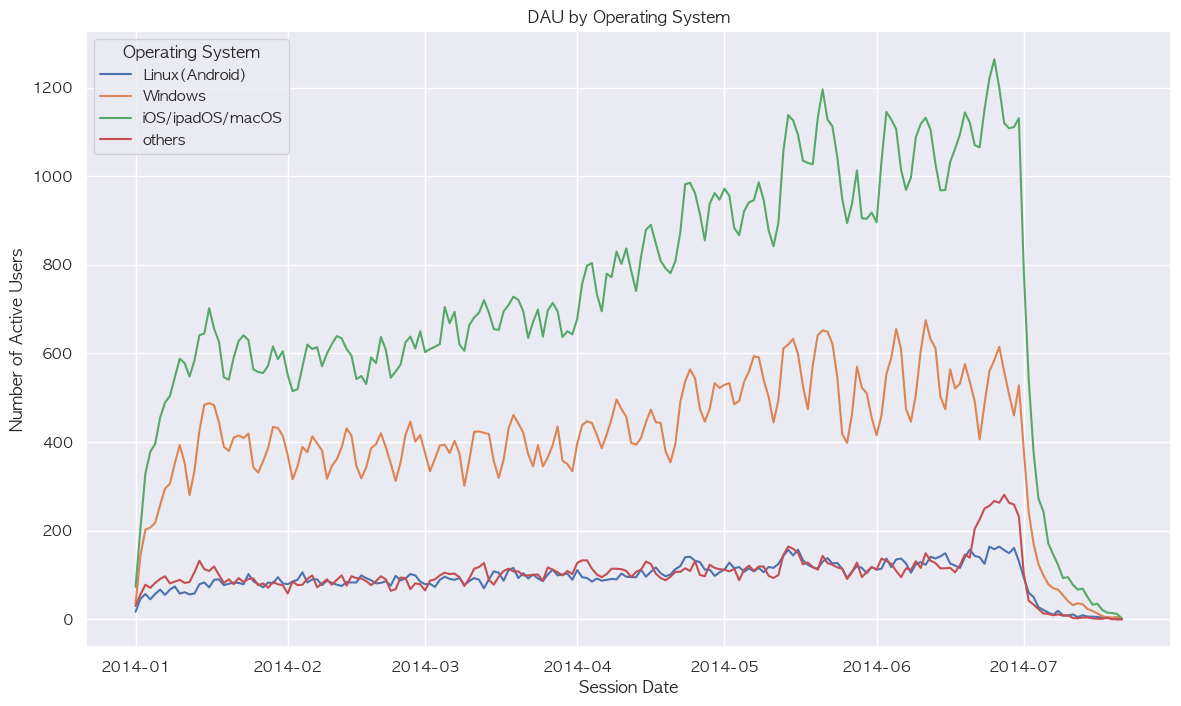

In [19]:
plt.figure(figsize=(14, 8))

for os_type in dau_os.columns:
    plt.plot(dau_os.index, dau_os[os_type], label=os_type)

plt.title('DAU by Operating System')
plt.xlabel('Session Date')
plt.ylabel('Number of Active Users')
plt.legend(title='Operating System')
plt.show()

## 2) WAU 시각화

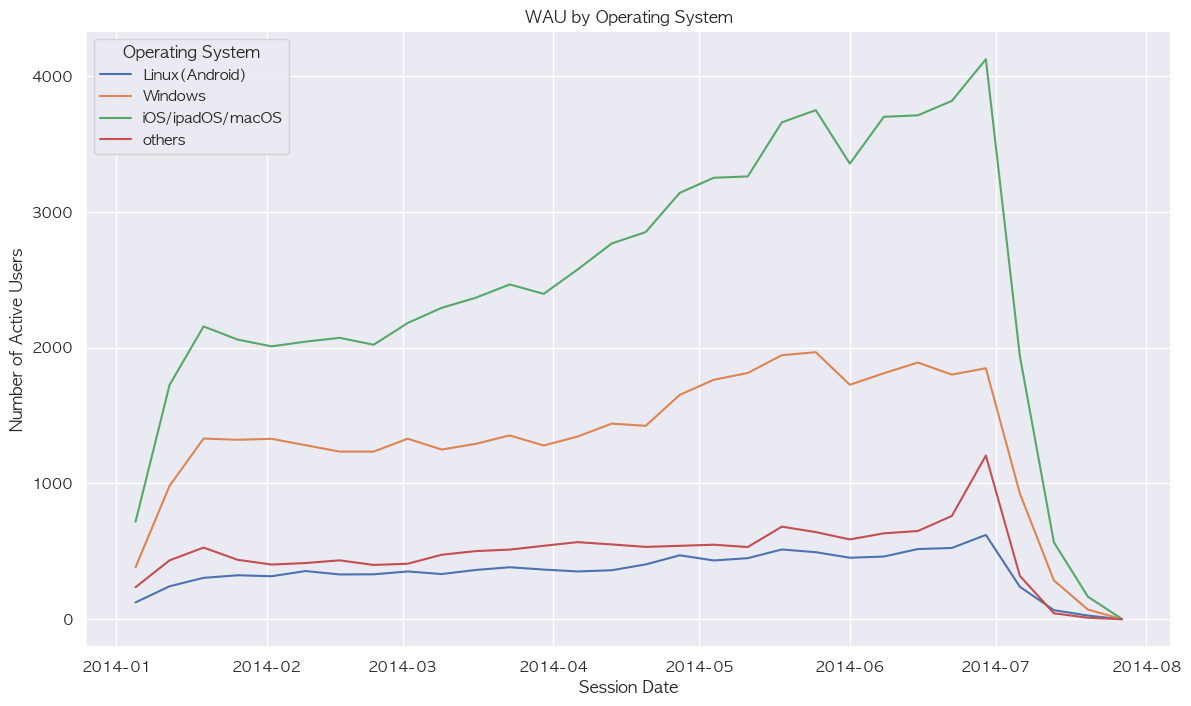

In [20]:
plt.figure(figsize=(14, 8))

for os_type in wau_os.columns:
    plt.plot(wau_os.index, wau_os[os_type], label=os_type)

plt.title('WAU by Operating System')
plt.xlabel('Session Date')
plt.ylabel('Number of Active Users')
plt.legend(title='Operating System')
plt.show()

## 3) MAU 시각화

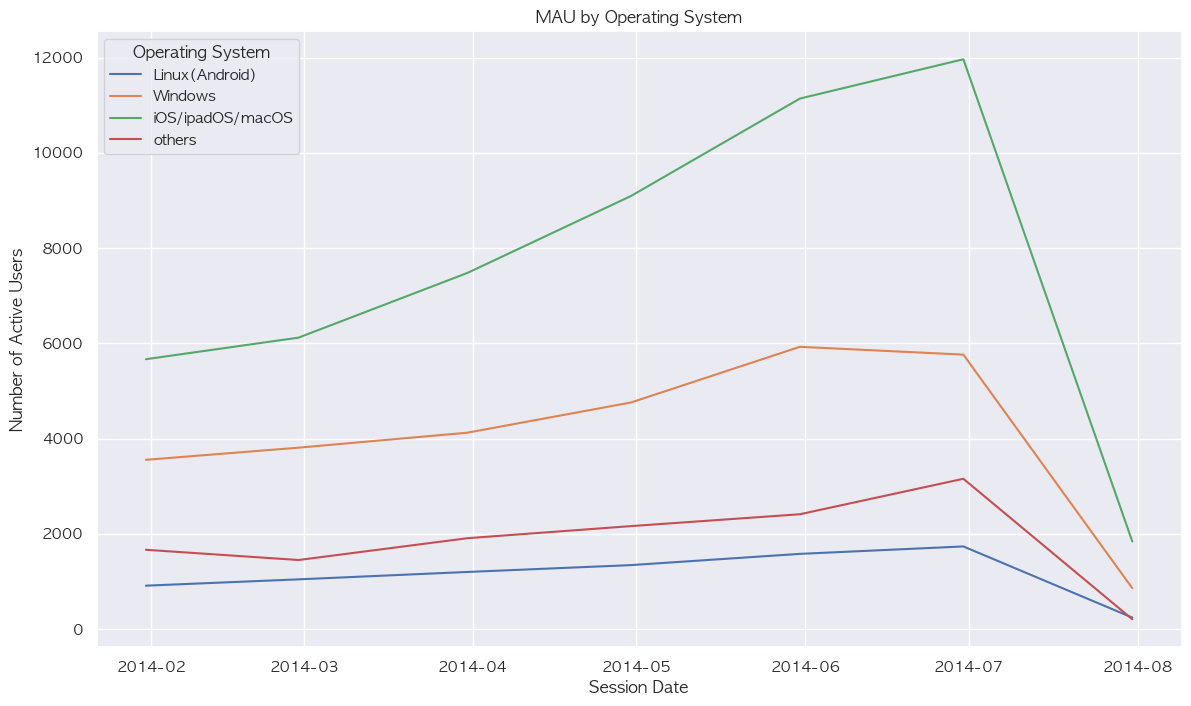

In [21]:
plt.figure(figsize=(14, 8))

for os_type in mau_os.columns:
    plt.plot(mau_os.index, mau_os[os_type], label=os_type)

plt.title('MAU by Operating System')
plt.xlabel('Session Date')
plt.ylabel('Number of Active Users')
plt.legend(title='Operating System')
plt.show()